<a href="https://colab.research.google.com/github/srimoyeeegangz/ML-lab-codes/blob/main/15)_weather_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded_weather=files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [ ]:
import numpy as np
import pandas as pd

# Generate synthetic data for 100 weather stations
np.random.seed(42)
latitudes = np.random.uniform(low=30.0, high=50.0, size=100)  # latitude
longitudes = np.random.uniform(low=-120.0, high=-80.0, size=100)  # longitude
temperature = np.random.uniform(low=10.0, high=35.0, size=100)  # temperature in degrees Celsius

# Construct DataFrame
weather_df = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'temperature': temperature
})

print(weather_df.head())


    latitude   longitude  temperature
0  37.490802 -118.742833    26.050791
1  49.014286  -94.543584    12.103499
2  44.639879 -107.425761    14.040718
3  41.973170  -99.657172    32.463855
4  33.120373  -83.697341    25.160726


In [ ]:
# Check for missing values
print(weather_df.isnull().sum())

# Scale features for DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(weather_df)


latitude       0
longitude      0
temperature    0
dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN, tune eps and min_samples as needed
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to DataFrame
weather_df['cluster'] = labels


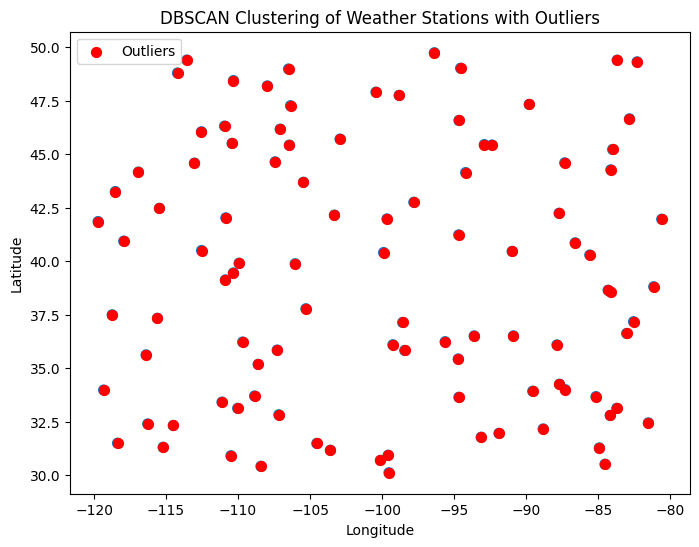

In [ ]:
import matplotlib.pyplot as plt

# Plot clustering result
plt.figure(figsize=(8, 6))
plt.scatter(weather_df['longitude'], weather_df['latitude'], c=weather_df['cluster'], cmap='tab20', s=50)

# Highlight outliers in red
outliers = weather_df['cluster'] == -1
plt.scatter(weather_df.loc[outliers, 'longitude'], weather_df.loc[outliers, 'latitude'], color='red', s=50, label='Outliers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Weather Stations with Outliers')
plt.legend()
plt.show()
